In [120]:
import numpy as np
import matplotlib.pyplot as plt

# สร้าง data 

In [121]:
#Generate Date to train
observation = 1000 #ตัวเเปรนี้จะบอกขนาดของข้อมูล
#np.random.uniform(low, high, size)

xs = np.random.uniform(low = -10, high = 10, size = (observation, 1))
#xs 1000x1
zs = np.random.uniform(low = -10, high = 10, size = (observation, 1))
#zs 1000x1
inputs = np.column_stack((xs, zs))# ตัวเเปรนี้รวม xs, zs เข้าด้วยกัน

# ค่า input k = 2
# จำนวนobservation n = 1000

# สร้างคำตอบ

In [122]:
#Create date target 
#targets = f(x,z) = 2*x - 3*z +5  + noise
#2* คือ w1, 3* คือ w2, 5 คือ bias
noise = np.random.uniform(-1, 1, (observation,1 ))

targets = 2*xs - 3*zs + 5 + noise
# ค่าoutput m = 1

# กำหนดค่าเริ่มต้นต่างๆ
 * ข้อดีของการเขียนเองจะช่วยให้เรานั้นสามารถกำหนดอะไรต่างๆได้เยอะ

In [123]:
init_range = 0.1
learning_rate = 0.00001
n = 1000
k = 2
m = 1
weights = np.random.uniform(low = -init_range, high = init_range, size=(k, m))
biases = np.random.uniform(low = -init_range, high = init_range, size = (1, m))

# Optimizer  Gradient descent

In [124]:
#input = 1000 x 2
his_gd = list()
err_gd = list()
max_epoch = 10000
epoc = 0
while epoc < max_epoch:
    
    outputs = np.dot(inputs , weights) + biases
    deltas = outputs - targets#หา Error
    #1000 x 1
    #n x m

    loss = np.sum(deltas **2) /2 /observation #MSE
    #print(loss)
        
    deltas_scaled = deltas / observation
    #1000 x 1         
    
    weights = weights - learning_rate * np.dot(inputs.T, deltas_scaled)#update weights
    biases = biases - learning_rate * np.sum(deltas_scaled)#update biases
    his_gd.append(epoc)
    err_gd.append(loss)
    
    epoc +=1

# 2*xs - 3*zs + 5 + noise
# คำตอบที่ต้องการ 2, -3, 5

In [125]:
print(weights,'\n', biases)
print("min loss", min(err_gd))

[[ 0.55939163]
 [-0.91066655]] 
 [[0.08126685]]
min loss 116.62943668442962


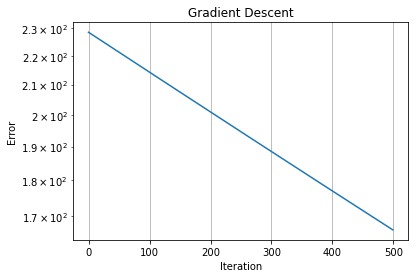

In [110]:
plt.semilogy(his_gd, err_gd, np.exp(-len(his)/0.5))
plt.xlabel("Iteration")
plt.ylabel("Error")
plt.title("Gradient Descent")
plt.grid(True)
plt.show()

In [111]:
his_mt = list()
err_mt = list()
max_epoch = 500
epoc = 0
v1 = 0
gamma = 0.9
while epoc < max_epoch:
    
    outputs = np.dot(inputs , weights) + biases
    deltas = outputs - targets#หา Error
    #1000 x 1
    #n x m

    loss = np.sum(deltas **2) /2 /observation #MSE
    #print(loss)
    deltas_scaled = deltas / observation
    #1000 x 1
    
    v1 = gamma * v1 + np.dot(inputs.T,deltas_scaled)
    
    weights = weights - learning_rate * v1 #update weights
    biases = biases - learning_rate * np.sum(deltas_scaled)#update biases
    his_mt.append(epoc)
    err_mt.append(loss)
    
    epoc +=1

# คำตอบที่ต้องการ 2, -3, 5

In [112]:
print(weights,'\n', biases)
print("Min Loss", min(err_mt))

[[ 1.70762428]
 [-2.57596782]] 
 [[0.02438691]]
Min Loss 17.422568184185117


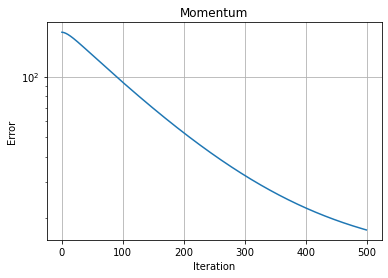

In [113]:
plt.semilogy(his_mt, err_mt, np.exp(-len(his)/0.5))
plt.xlabel("Iteration")
plt.ylabel("Error")
plt.title('Momentum')
plt.grid(True)
plt.show()

# gradient descent vs Momentum

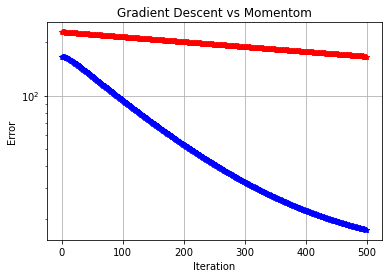

In [114]:
plt.semilogy(his_mt, err_mt, np.exp(-len(his_mt)/0.5), c = 'blue', label = 'Momentum', marker="*", linewidth=3)
plt.semilogy(his_gd, err_gd, np.exp(-len(his_gd)/0.5), c = 'red', label = "Gradient Descent", marker="*", linewidth=3)
plt.xlabel("Iteration")
plt.ylabel("Error")
plt.title('Gradient Descent vs Momentom')
plt.grid(True)
plt.show()